In [4]:
import pandas as pd
import numpy as np
import os

Download the data

Pull in the data.   Create separate dataframes for the state by state data and the investor information.

In [10]:
# set the base directory
os.chdir('/home/jovyan/data-512/data-512-final/data-512-final')

# read the data
df_inv = pd.read_csv('raw_data/NFCS_2018_Investor_Data_191107.csv')
df_sbs = pd.read_csv('raw_data/NFCS_2018_State_Data_190603.csv')

In [11]:
# preview the results
df_inv.head()

,NFCSID,A1,A2,A3,B2_1,B2_2,B2_3,B2_4,B2_5,B2_7,...,G12,G13,H2,H3,WGT1,S_Gender,S_Age,S_Ethnicity,S_Education,S_Income
0,2018010042,2,1,1,98,98,1,1,98,2,...,3,4,1,2,0.910655,2,3,1,1,2
1,2018010047,1,1,1,1,1,1,1,1,2,...,2,2,1,1,1.566608,1,1,2,2,2
2,2018010050,2,1,1,1,1,2,2,2,2,...,98,98,1,2,0.609443,2,3,1,2,2
3,2018010051,1,1,1,2,2,1,2,1,2,...,1,4,1,2,0.609443,1,3,1,2,2
4,2018010053,1,1,1,1,1,1,1,2,1,...,3,4,1,1,0.609443,1,3,1,2,3


Define "participation" in the following ways:

* Primary decision maker (otherwise, they may just coincidentally have accounts) 
  A1 = 1 OR 2
* Hold investments in retirement accounts (e.g., 401(k), IRA, etc.)
A2

In [ ]:
# lets define participation as holding a retirement investment account or a private investment account


In [14]:
# visuals

# import libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# magic code for viewing plots using jupyter notebooks:
%matplotlib inline

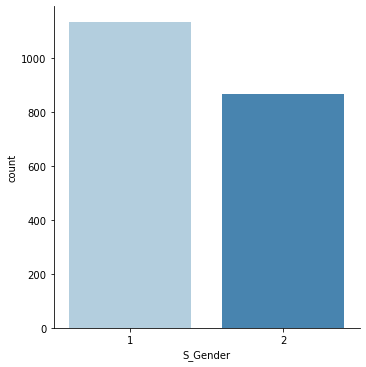

In [16]:
# plot the gender distribution
sns.catplot(x="S_Gender", 
            kind="count", 
            data=df_inv,
           # order=["none", "some", "hs", "bachelors", "professional", "masters", "doctorate"],
            palette=("Blues"))

In [58]:
participant = df_inv.loc[df_inv['A1'].isin([1,2]) & ((df_inv['A2']==1) | (df_inv['A3']==1)) ] == True

In [59]:
df_inv['Participant'] = participant

ValueError: Wrong number of items passed 105, placement implies 1

In [55]:
# we see slightly more men than women in the survey.

# let's create a new column to identify participants

df_inv.loc[df_inv['A1'].isin([1,2]) & ((df_inv['A2']==1) | (df_inv['A3']==1)) ].head(10)

,NFCSID,A1,A2,A3,B2_1,B2_2,B2_3,B2_4,B2_5,B2_7,...,G12,G13,H2,H3,WGT1,S_Gender,S_Age,S_Ethnicity,S_Education,S_Income
0,2018010042,2,1,1,98,98,1,1,98,2,...,3,4,1,2,0.910655,2,3,1,1,2
1,2018010047,1,1,1,1,1,1,1,1,2,...,2,2,1,1,1.566608,1,1,2,2,2
2,2018010050,2,1,1,1,1,2,2,2,2,...,98,98,1,2,0.609443,2,3,1,2,2
3,2018010051,1,1,1,2,2,1,2,1,2,...,1,4,1,2,0.609443,1,3,1,2,2
4,2018010053,1,1,1,1,1,1,1,2,1,...,3,4,1,1,0.609443,1,3,1,2,3
5,2018010054,2,1,1,1,2,1,2,1,2,...,98,98,1,2,0.609443,2,3,1,2,3
6,2018010066,1,1,1,2,2,1,2,2,2,...,98,98,1,1,0.609443,2,3,1,2,2
7,2018010078,1,1,1,2,2,1,2,2,2,...,1,3,1,1,0.910655,2,3,1,1,1
8,2018010082,1,1,1,1,2,1,2,2,2,...,98,3,1,1,0.609443,2,3,1,2,2
9,2018010094,2,1,1,2,2,1,2,1,2,...,2,99,1,1,0.609443,1,3,1,2,3


In [44]:
df_inv.loc[df_inv['A1'].isin([1,2]) & ((df_inv['A2']==1) | (df_inv['A3']==1)) ].head(10)

,NFCSID,A1,A2,A3,B2_1,B2_2,B2_3,B2_4,B2_5,B2_7,...,G12,G13,H2,H3,WGT1,S_Gender,S_Age,S_Ethnicity,S_Education,S_Income
0,2018010042,2,1,1,98,98,1,1,98,2,...,3,4,1,2,0.910655,2,3,1,1,2
1,2018010047,1,1,1,1,1,1,1,1,2,...,2,2,1,1,1.566608,1,1,2,2,2
2,2018010050,2,1,1,1,1,2,2,2,2,...,98,98,1,2,0.609443,2,3,1,2,2
3,2018010051,1,1,1,2,2,1,2,1,2,...,1,4,1,2,0.609443,1,3,1,2,2
4,2018010053,1,1,1,1,1,1,1,2,1,...,3,4,1,1,0.609443,1,3,1,2,3
5,2018010054,2,1,1,1,2,1,2,1,2,...,98,98,1,2,0.609443,2,3,1,2,3
6,2018010066,1,1,1,2,2,1,2,2,2,...,98,98,1,1,0.609443,2,3,1,2,2
7,2018010078,1,1,1,2,2,1,2,2,2,...,1,3,1,1,0.910655,2,3,1,1,1
8,2018010082,1,1,1,1,2,1,2,2,2,...,98,3,1,1,0.609443,2,3,1,2,2
9,2018010094,2,1,1,2,2,1,2,1,2,...,2,99,1,1,0.609443,1,3,1,2,3


In [ ]:
# plot education distribution
sns.catplot(y="education", 
            kind="count", 
            data=toxicity_worker_demographics,
            order=["none", "some", "hs", "bachelors", "professional", "masters", "doctorate"],
            palette=("Blues"))

# plot gender dist
sns.catplot(x="gender", 
            kind="count", 
            data=toxicity_worker_demographics,
            palette=("Blues"))

# plot age group dist
sns.catplot(x="age_group", 
            kind="count", 
            data=toxicity_worker_demographics,
            order=["Under 18", "18-30", "30-45", "45-60", "Over 60"],
            palette=("Blues"))

# plot language dist
sns.catplot(x="english_first_language", 
            kind="count", 
            data=toxicity_worker_demographics,
            palette=("Blues"))

plt.tight_layout()

In [ ]:
# join the labels and comments
toxicity_annotated_comments['labeled_toxic'] = toxicity_labels

In [ ]:
# preview the results
toxicity_annotated_comments.loc[toxicity_annotated_comments['labeled_toxic'] == True].head(10)

In [ ]:
# join demographics to annotations
joined_toxicity_demographics = toxicity_annotations.join(toxicity_worker_demographics, on="worker_id", rsuffix="_r")

In [ ]:
# calculate average toxicity per user
avg_worker_toxicity = joined_toxicity_demographics.groupby("worker_id")["toxicity_score"].mean()

# join the average toxicity to the demographics table
toxicity_worker_demographics = toxicity_worker_demographics.join( avg_worker_toxicity )

# preview the results
toxicity_worker_demographics.head()

In [ ]:
# create barplot, specify the order
sns.barplot(y="education", 
                 x="toxicity_score", 
                 data=toxicity_worker_demographics, 
                 order=["none", "some", "hs", "bachelors", "professional", "masters", "doctorate"],
                 palette=("Blues"))

# save results for README file
fig = sns_plot.get_figure()
fig.savefig('output.png')